<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/Rorschach_labeler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 14.2 MB/s 
     |████████████████████████████████| 189 kB 51.3 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 1.2 MB 69.4 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 51 kB 338 kB/s 
Mounted at /content/gdrive


In [9]:
from fastai.vision.all import *
import cv2

In [3]:
path =  Path('/content/gdrive/MyDrive/study/Symmetry')

In [4]:
fnames = get_image_files(path/'Rorschach_images')
fnames[2]

Path('/content/gdrive/MyDrive/study/Symmetry/Rorschach_images/Без названия (1).png')

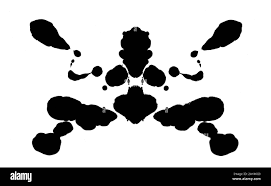

In [5]:
img = Image.open(fnames[2])
img

In [6]:
tensor_img = image2tensor(img)
tensor_img.size()

torch.Size([1, 186, 271])

Изображения в датасете симметричные, поэтому маски к ним можно сделать одинаковые: 0 для левой стороны, 1 для правой.

In [ ]:
img.size[1]

In [33]:
aa=5
str(fnames[15])[:-4]
str(fnames[aa])[:-4]+'_P.png'
str(fnames[25])

'/content/gdrive/MyDrive/study/Symmetry/Rorschach_images/images (3).png'

In [34]:
for ind, o in enumerate(fnames):
  img = Image.open(fnames[2])
  #img_t = image2tensor(img[1,:,:])
  img_t = torch.zeros(img.size) # заготовка из нулей
  leng_img = img.size[1]//2
  aa = str(o)
  save_path = aa[:-4] + '_P.png'
  img_t[:, 0:leng_img] = 1 #левая сторона единицы
  #save(img_t, fnames[o]+'_P') 
  #img_path_temp[i] = img_path + img_title[0:-4] + '_ch' + str(i) + '.tiff' # path 0
  cv2.imwrite(save_path, img_t) # save channels in a temporary tiff file



TypeError: ignored